<a href="https://colab.research.google.com/github/Rayryu/Urban-Air-Pollution-Challenge/blob/master/Urban_Air_Pollution_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Problem statement

Objective : predict PM2.5 particulate matter concentration in the air every day for each city.

PM2.5: atmospheric particulate matter that have a diameter of less than 2.5 micrometers and is one of the most harmful air pollutants

Dataset: The data covers the last three months air quality measures, spanning hundreds of cities across the globe.


- Additional information

Air quality guideline is an annual mean concentration guideline for particulate matter from the World Health Organization. 
The guideline stipulates that PM2.5 not exceed **10 μg/m3 annual mean**, or **25 μg/m3 24-hour mean**. (https://en.wikipedia.org/wiki/Air_quality_guideline) 

# Reading data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

path = "drive/My Drive/Zindi-Air-polution-dataset/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv(path+"Train.csv")
#Remove the first 3 columns
data = data.drop(["Place_ID X Date", "Date", "Place_ID"], axis = 1)
data.head()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.000000,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,0.015904,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000059,7311.869141,

# Data exploration

## Columns description

In [0]:
data.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,28368.000000,28368.000000,28368.000000,28368.000000,28368.000000,28367.000000,28367.000000,28367.000000,28367.000000,28367.000000,28367.000000,21888.000000,30274.000000,30274.000000,30274.000000,30274.000000,30274.000000,30274.000000,30274.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,2.313200e+04,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,29035.000000,29035.000000,30183.000000,29035.000000,29035.000000,29035.000000,30183.000000,30183.000000,30183.000000,30183.000000,29035.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,23320.000000,23320.000000,23320.000000,23249.000000,23320.000000,23320.000000,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,0.088486,0.000094,0.000163,-1.093982,0.278011,755880.302425,-10.597347,32.764304,-111.413784,44.432617,0.000032,13342.570998,0.000056,0.139533,222.293932,0.423740,-11.308360,35.727367,-117.739509,47.752032,0.036230,983.448217,1438.006332,821611.615359,-12.590815,35.009648,-124.192829,47.605340,4.320685e-05,0.199705,-14.127472,35.849977,-122.640817,46.802819,0.000088,1.064105,2510.989311,77491.774334,0.433513,18.201564,3286.134009,70799.498221,-11.556380,36.520395,-120.055549,48.584734,0.226843,-1.161213,832553.776969,-11.152614,36.667009,-118.855468,48.752878,0.000113,0.429221,0.000032,-1.


#### Target
* target : daily mean concentration
* target_min: minimum reading of the day
* target_max: maximum reading of the day
* target_variance: variance of the readings
* target_count: total number of sensor readings used to compute the target value

#### Humidity / Precipitable water
* precipitable_water_entire_atmosphere:	Precipitable water for entire atmosphere. range(0, 100)
* relative_humidity_2m_above_ground: % , range(1*, 100.05*)
* specific_humidity_2m_above_ground: g/kg, range(0*, 0.03*)

#### Temperature
* temperature_2m_above_ground: °C	-69.18*	52.25*

#### Wind
* u_component_of_wind_10m_above_ground:	m/s	-60.73*	59.28*
* v_component_of_wind_10m_above_ground:	m/s	-63.78*	59.39*

#### NO2 
* L3_NO2_NO2_column_number_density: Total vertical column of NO2 (ratio of the slant column density of NO2 and the total air mass factor)  mol/m^2	-0.00051*	0.0192*
* L3_NO2_NO2_slant_column_number_density: mol/m^2	1.48e-05*	0.003908* NO2 slant column density
* L3_NO2_cloud_fraction: fraction	0*	1*	Effective cloud fraction
* L3_NO2_absorbing_aerosol_index: Dimensionless	-14.43*	10.67*	Aerosol index
* L3_NO2_stratospheric_NO2_column_number_density:	mol/m^2	8.6e-06*	0.000107*	stratospheric vertical column of NO2
* L3_NO2_tropopause_pressure:	Pa	6156*	37345*	topopause pressure
* L3_NO2_tropospheric_NO2_column_number_density        :	mol/m^2	-0.0005375*	0.0192044*	 tropospheric vertical column of NO2
* L3_NO2_sensor_altitude: m	828543*	856078*	 Altitude of the satellite 
* L3_NO2_sensor_azimuth_angle: -180* 180* Azimuth angle of the satellite 
* L3_NO2_sensor_zenith_angle: degrees	0.09*	67*	Zenith angle of the satellite 
* L3_NO2_solar_azimuth_angle: degrees	-180*	180*	Azimuth angle of the Sun 
* L3_NO2_solar_zenith_angle: degrees	8*	82*	 Zenith angle of the satellite 

#### O3
* L3_O3_column_number_density: mol/m^2	0.025*	0.3048*	 Total atmospheric column of O3 between the surface and the top of atmosphere
* L3_O3_effective_temperature:	K	19.92*	428.11*	 Ozone cross section effective temperature
* L3_O3_cloud_fraction: fraction	0*	1*	 Effective cloud fraction
* L3_O3_sensor_azimuth_angle: degrees	-180*	180*	 Azimuth angle of the satellite at the ground pixel location
* L3_O3_sensor_zenith_angle	:degrees	0.098*	66.57*	Zenith angle of the satellite at the ground pixel location 
* L3_O3_solar_azimuth_angle	:degrees	-180*	180*	Azimuth angle of the Sun at the ground pixel location
* L3_O3_solar_zenith_angle: degrees	8*	102*	Zenith angle of the satellite at the ground pixel location

#### C0
* L3_CO_CO_column_number_density: mol/m^2	-34.43*	5.71*	Vertically integrated CO column density
* L3_CO_H2O_column_number_density: mol/m^2	-2.18563e+07*	78420*	 Water vapor column.
* L3_CO_cloud_height: m	-7516*	5000*	 Scattering layer height.
* L3_CO_sensor_altitude: m	828542*	856078*	 Altitude of the satellite with respect to the geodetic sub-satellite point   
* L3_CO_sensor_azimuth_angle:	degrees	-180*	180*
* L3_CO_sensor_zenith_angle:	1*	66*
* L3_CO_solar_azimuth_angle:	-180*	180*
* L3_CO_solar_zenith_angle: 9*	80*

#### HCHO
* L3_HCHO_HCHO_slant_column_number_density:  mol/m^2	-0.01425*	0.00735*
* L3_HCHO_cloud_fraction: 0*	1*
* L3_HCHO_tropospheric_HCHO_column_number_density: -0.0172*	0.0074*	
* L3_HCHO_tropospheric_HCHO_column_number_density_amf: 0.177*	4.058*	Tropospheric air mass factor.
* L3_HCHO_sensor_azimuth_angle:	    -180*	180*
* L3_HCHO_sensor_zenith_angle:		0.098*	66.57*
* L3_HCHO_solar_azimuth_angle:	-180*	180*
* L3_HCHO_solar_zenith_angle:	8.76*	101.17*

#### Cloud
* L3_CLOUD_cloud_base_height: m	9*	14540*	 Cloud base height
* L3_CLOUD_cloud_base_pressure: Pa	14170*	101299*	Cloud base pressure
* L3_CLOUD_cloud_fraction: fraction	0*	1*	Retrieved effective radiometric cloud fraction
* L3_CLOUD_cloud_optical_depth: m	1*	250*	Retrieved cloud optical depth
* L3_CLOUD_cloud_top_height: m	9*	15455*	Retrieved altitude of the cloud top
* L3_CLOUD_cloud_top_pressure: Pa	12110*	101299*	 Retrieved atmospheric pressure at the level of cloud top
* L3_CLOUD_surface_albedo: 3.95845e-11*	1*	Surface albedo
* L3_CLOUD_sensor_azimuth_angle	:   -180*	180*
* L3_CLOUD_sensor_zenith_angle:	0.09*	66.44*
* L3_CLOUD_solar_azimuth_angle:	-180*	180*
* L3_CLOUD_solar_zenith_angle: 8*	80*

#### AEROSOL
* L3_AER_AI_absorbing_aerosol_index: -21*	39*	 A measure of the prevalence of aerosols in the atmosphere, c
* L3_AER_AI_sensor_altitude: m	828543*	856078*
* L3_AER_AI_sensor_azimuth_angle	
* L3_AER_AI_sensor_zenith_angle	
* L3_AER_AI_solar_azimuth_angle	
* L3_AER_AI_solar_zenith_angle

#### SO2
* L3_SO2_SO2_column_number_density: mol/m^2	-0.4051*	0.2079*	 SO2 vertical column density, calculated using the DOAS technique.
* L3_SO2_SO2_column_number_density_amf: mol/m^2	0.1*	3.387*	Weighted mean of cloudy and clear air mass factor (amf) weighted by intensity-weighted cloud fraction
* L3_SO2_SO2_slant_column_number_density: mol/m^2	-0.14746*	0.16159*	 SO2 ring corrected slant column number density
* L3_SO2_absorbing_aerosol_index: -11.733*	18.657*	A measure of the prevalence of aerosols in the atmosphere, calculated by this equation
* L3_SO2_cloud_fraction: fraction	0*	1*	Effective cloud fraction.
* L3_SO2_sensor_azimuth_angle	
* L3_SO2_sensor_zenith_angle	
* L3_SO2_solar_azimuth_angle	
* L3_SO2_solar_zenith_angle

#### CH4
* L3_CH4_CH4_column_volume_mixing_ratio_dry_air: ppmV	1491*	2352*	column averaged dry air mixing ratio of methane
* L3_CH4_aerosol_height: m	906*	11251*	aerosol height parameter in the CH4 retrieval
* L3_CH4_aerosol_optical_depth: 	0.00032*	0.2405*	aerosol optical thickness in the SWIR band
* L3_CH4_sensor_azimuth_angle	
* L3_CH4_sensor_zenith_angle	
* L3_CH4_solar_azimuth_angle	
* L3_CH4_solar_zenith_angle

## Detecting invalid data

In [0]:
data.isnull().sum(axis=1)

0         6
1         0
2         7
3         7
4         7
         ..
30552     7
30553     0
30554     7
30555     7
30556    63
Length: 30557, dtype: int64

Columns with invalid data
- L3_NO2_NO2_slant_column_number_density (min?)
- L3_NO2_sensor_altitude (min = 0)
- L3_NO2_sensor_zenith_angle (min =0)
- L3_NO2_solar_zenith_angle (min = 0)
- stratospheric_NO2_column_number_density (min=0)
- L3_NO2_tropopause_pressure (min=0) pression impossible ? 
- O3_column_number_density 'min=0
- O3_effective_temperature 'min=0 impossible
- L3_O3_sensor_zenith_angle	min=0
- L3_O3_solar_zenith_angle min =0
- L3_CO_CO_column_number_density min=0
- L3_CO_H2O_column_number_density min=0 (peut-être abérante)
-  L3_CO_sensor_altitude min =0
-  L3_CO_sensor_zenith_angle min =0
-  L3_CO_solar_zenith_angle min =0
-  L3_HCHO_sensor_zenith_angle min =0
-  L3_HCHO_solar_zenith_angle min =0
-  L3_HCHO_tropospheric_HCHO_column_number_density_amf min =0
- L3_CH4_CH4_column_volume_mixing_ratio_dry_air min =0
- L3_CH4_aerosol_height min =0
- L3_CH4_aerosol_optical_depth min =0

## Simple missing data replacement

In [0]:
data.columns[data.isna().sum()!=0]

Index(['L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle',
       'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
       'L3_CO_sensor_altitude', 'L3_CO_sensor_azimuth_angle',
       'L3_CO_sensor_zenith_angle', 'L3_CO_solar_azimuth_angle',
       'L3_CO_solar_zenith_angle', 'L3_HCHO_HCHO_slant_column_nu

In [0]:
def replace_null(data):
    # To Do: fill with real min values!!

    return data.fillna(0)

In [0]:
data = replace_null(data)

## Analysing features #1

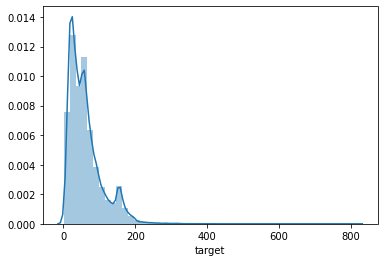

In [0]:
sns.distplot(data['target'])

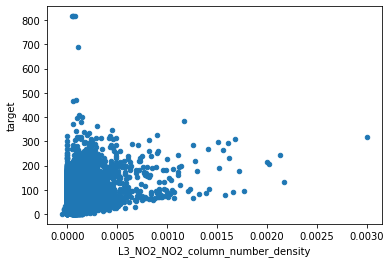

In [0]:
#scatter plot L3_NO2_NO2_column_number_density/target
var = 'L3_NO2_NO2_column_number_density'
_data = pd.concat([data['target'], data[var]], axis=1)
_data.plot.scatter(x=var, y='target')

In [0]:
corr = data.corr()
top_corr_features = corr.index

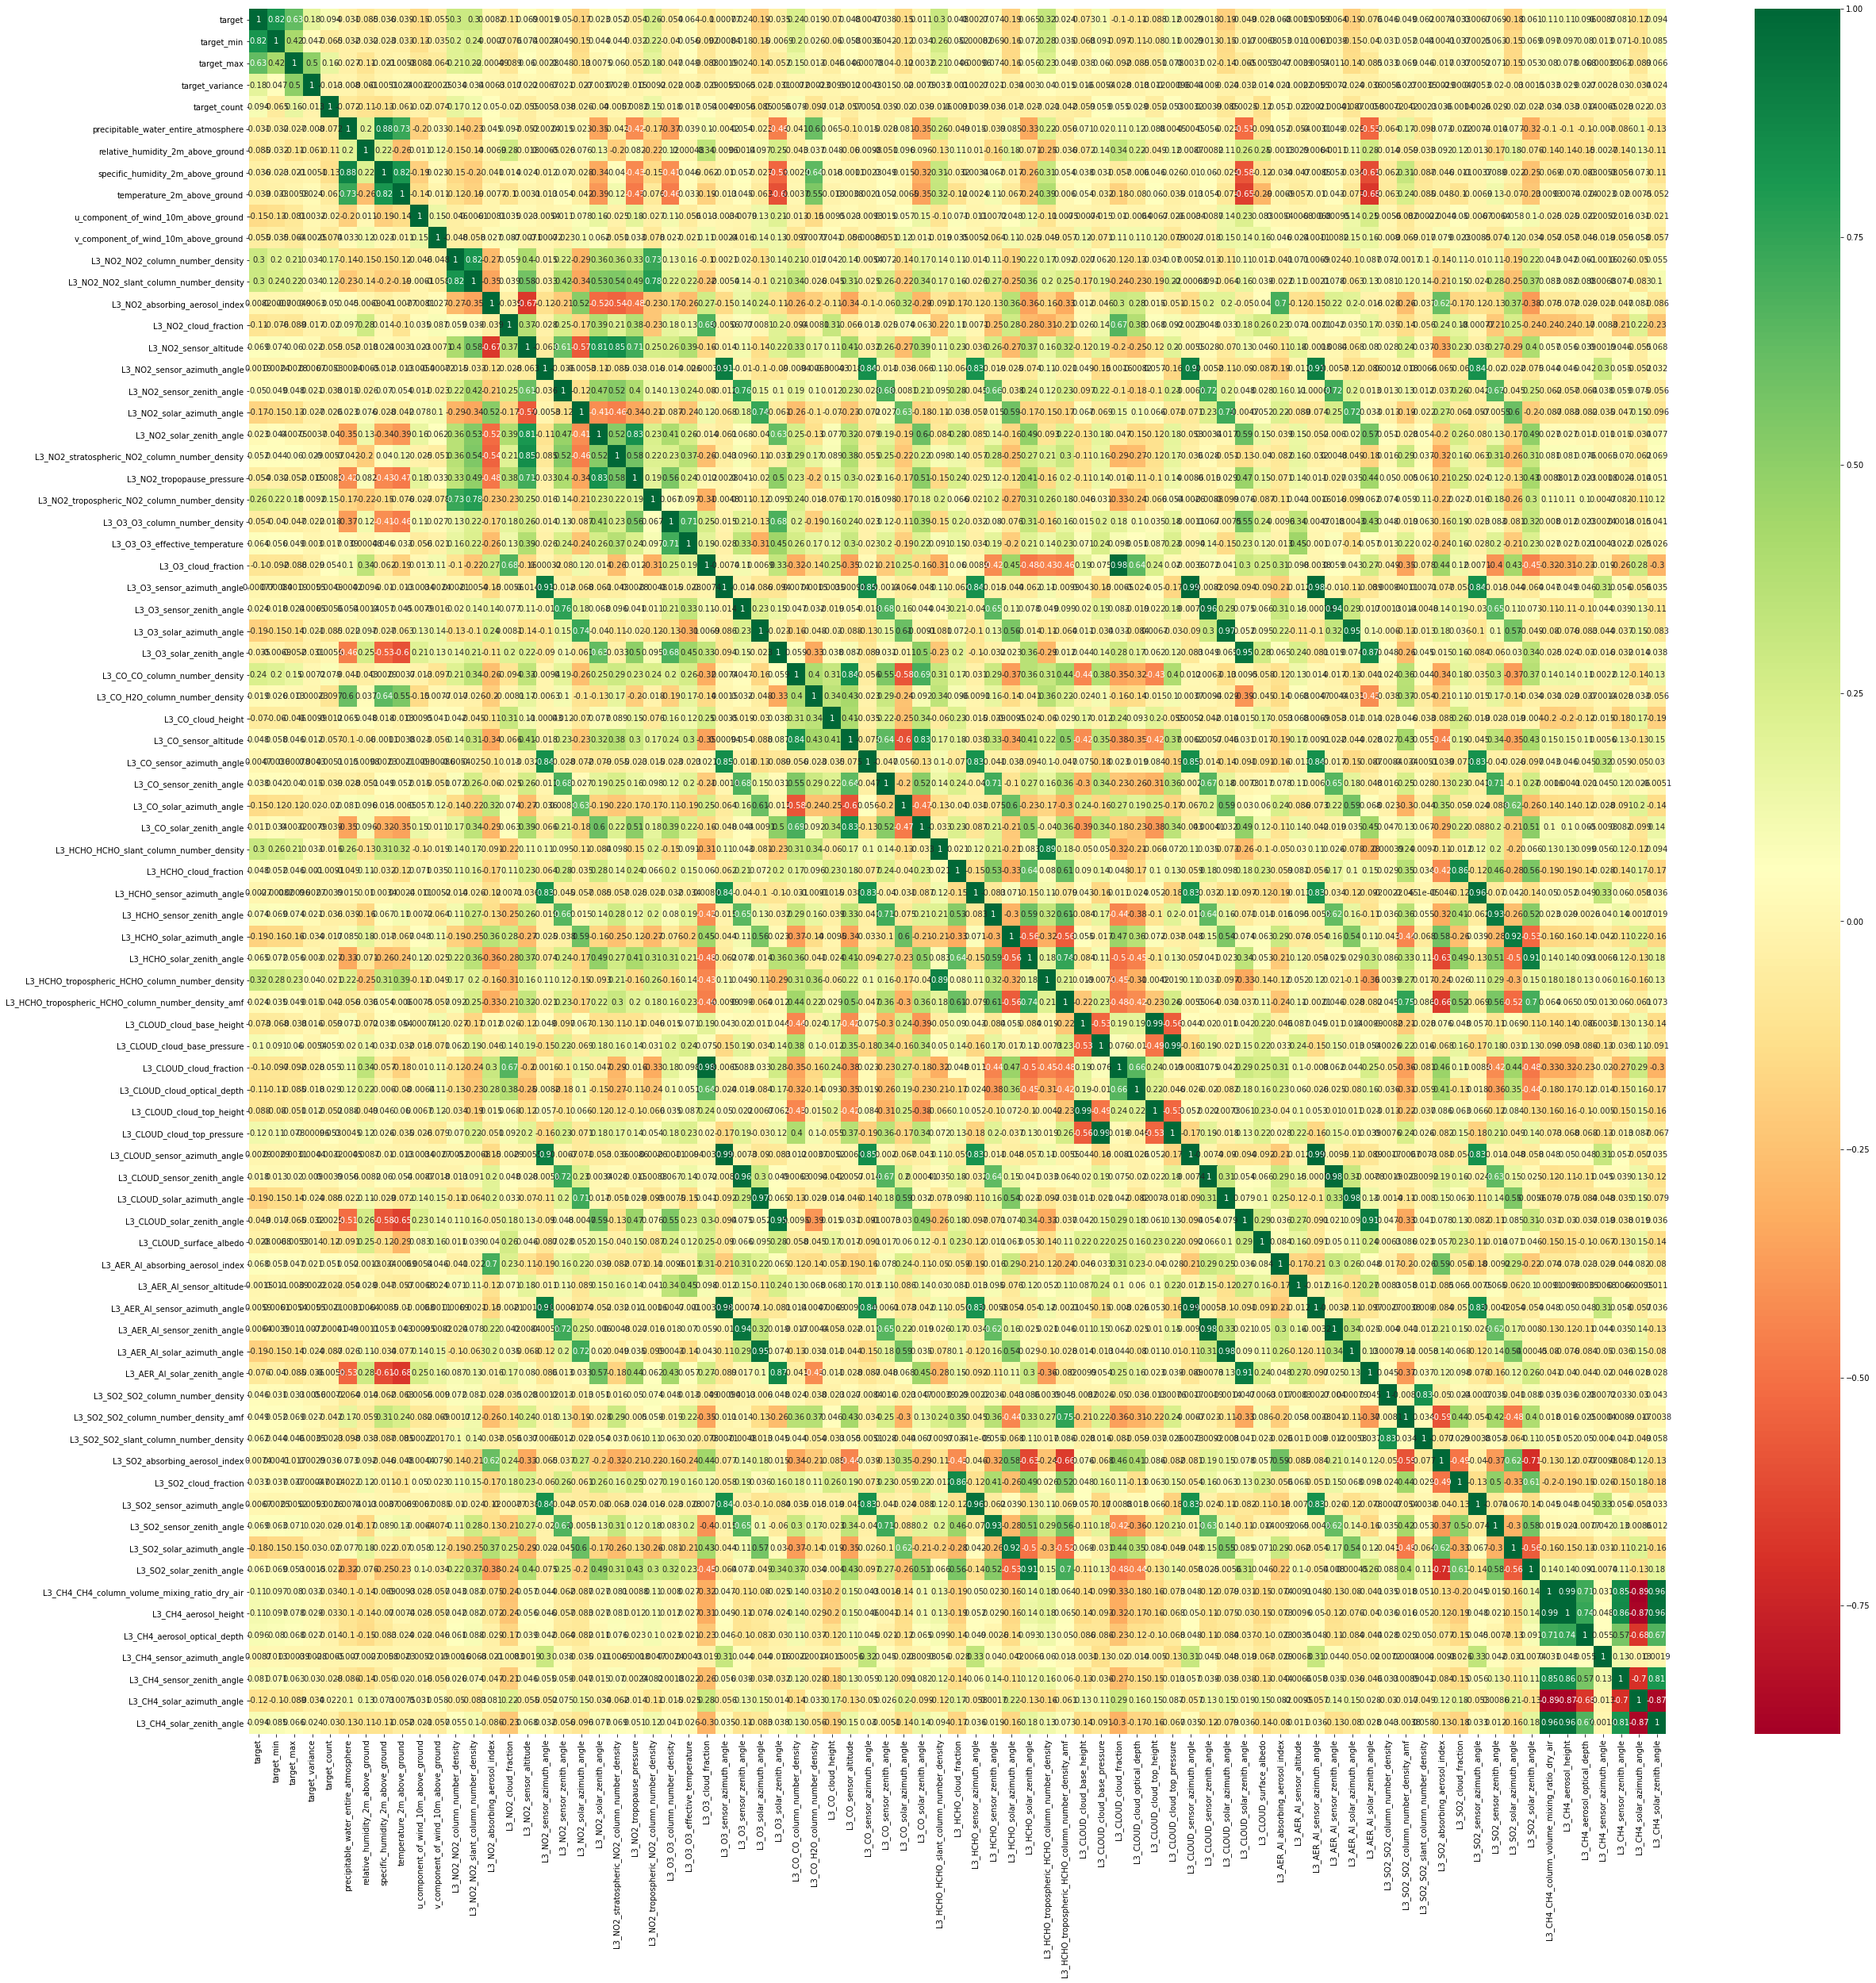

In [0]:
plt.figure(figsize=(40,40))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
# Sorting correlations
corr_matrix  = corr.abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)).to_frame()

sol.head(30)

0
L3_CH4_CH4_column_volume_mixing_ratio_dry_air L3_CH4_aerosol_height                            0.994228
L3_CLOUD_sensor_azimuth_angle                 L3_AER_AI_sensor_azimuth_angle                   0.994101
L3_CLOUD_cloud_base_height                    L3_CLOUD_cloud_top_height                        0.992572
L3_CLOUD_cloud_base_pressure                  L3_CLOUD_cloud_top_pressure                      0.991777
L3_O3_sensor_azimuth_angle                    L3_CLOUD_sensor_azimuth_angle                    0.989722
                                              L3_AER_AI_sensor_azimuth_angle                   0.984994
L3_O3_cloud_fraction                          L3_CLOUD_cloud_fraction                          0.983971
L3_CLOUD_sensor_zenith_angle                  L3_AER_AI_sensor_zenith_angle                    0.982830
L3_CLOUD_solar_azimuth_angle                  L3_AER_AI_solar_azimuth_angle                    0.980190
L3_O3_solar_azimuth_angle                     L3_CLOUD_solar_azimuth_angle                     0.967102
L3_CH4_CH4_column_volume_mixing_ratio_dry_air L3_CH4_solar_zenith_angle                        0.964251
L3_HCHO_sensor_azimuth_angle                  L3_SO2_sensor_azimuth_angle                      0.961999
L3_CH4_aerosol_height                         L3_CH4_solar_zenith_angle                        0.959611
L3_O3_sensor_zenith_angle                     L3_CLOUD_sensor_zenith_angle                     0.958584
L3_O3_solar_azimuth_angle                     L3_AER_AI_solar_azimuth_angle                    0.951710
L3_O3_solar_zenith_angle                      L3_CLOUD_solar_zenith_angle                      0.946138
L3_O3_sensor_zenith_angle                     L3_AER_AI_sensor_zenith_angle                    0.942787
L3_HCHO_sensor_zenith_angle                   L3_SO2_sensor_zenith_angle                       0.930805
L3_HCHO_solar_azimuth_angle                   L3_SO2_solar_azimuth_angle                       0.919376
L3_CLOUD_solar_zenith_angle                   L3_AER_AI_solar_zenith_angle                     0.913895
L3_NO2_sensor_azimuth_angle                   L3_O3_sensor_azimuth_angle                       0.913827
                                              L3_AER_AI_sensor_azimuth_angle                   0.905496
L3_HCHO_solar_zenith_angle                    L3_SO2_solar_zenith_angle                        0.905320
L3_NO2_sensor_azimuth_angle                   L3_CLOUD_sensor_azimuth_angle                    0.904461
L3_HCHO_HCHO_slant_column_number_density      L3_HCHO_tropospheric_HCHO_column_number_density  0.894578
L3_CH4_CH4_column_volume_mixing_ratio_dry_air L3_CH4_solar_azimuth_angle                       0.890242
precipitable_water_entire_atmosphere          specific_humidity_2m_above_ground                0.882341
L3_CH4_aerosol_height                         L3_CH4_solar_azimuth_angle                       0.872953
L3_O3_solar_zenith_angle                      L3_AER_AI_solar_zenith_angle                     0.870788
L3_CH4_solar_azimuth_angle                    L3_CH4_solar_zenith_angle                        0.866205

We can see that the majority of correlated variables are solar and sensor  related ones. 
Hypothesis: The data is from the same sensor!

The other correlated columns:

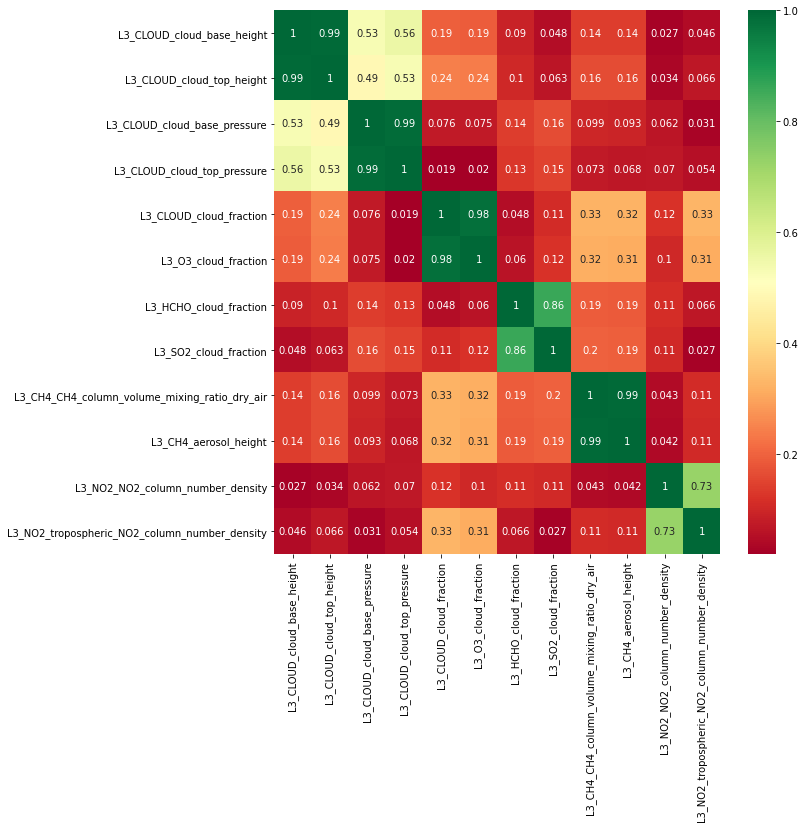

In [0]:
corr_cols = ["L3_CLOUD_cloud_base_height", "L3_CLOUD_cloud_top_height", "L3_CLOUD_cloud_base_pressure", "L3_CLOUD_cloud_top_pressure", 
             "L3_CLOUD_cloud_fraction", "L3_O3_cloud_fraction", "L3_HCHO_cloud_fraction", "L3_SO2_cloud_fraction",
             "L3_CH4_CH4_column_volume_mixing_ratio_dry_air", "L3_CH4_aerosol_height", 
             "L3_NO2_NO2_column_number_density", "L3_NO2_tropospheric_NO2_column_number_density"
             ]

sub_corr = pd.DataFrame(data, columns= corr_cols)
sub_corr_features = sub_corr.index
plt.figure(figsize=(10,10))
g=sns.heatmap(sub_corr.corr().abs(),annot=True,cmap="RdYlGn")

## Analysing features #2 (feature correlation)

### Selecting features based on correlation

In [0]:
def select_features_on_correlation(data, threshold):
    corr = data.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if columns[j]:
                    columns[j] = False
    selected_columns = data.columns[columns]
    
    return data[selected_columns]

In [0]:
fc_data = select_features_on_correlation(data, threshold=0.9)
fc_data.shape

(30557, 61)

### Selecting columns based on p-value

In [0]:
#Skipping target values
selected_columns = fc_data.columns[5:].values

import statsmodels.api as sm

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

SL = 0.05
data_modeled, selected_columns = backwardElimination(fc_data.iloc[:,5:].values, fc_data.iloc[:,0].values, SL, selected_columns)

In [0]:
len(selected_columns)

46

### Creating out final dataset

In [0]:
y = pd.DataFrame()
y['target'] = data.iloc[:,0].values.ravel()

In [0]:
X = pd.DataFrame(data = data_modeled, columns = selected_columns)

# First approche

## Data preparation

### Preparing train data

In [0]:
th = 1
SL = 0.05

fc_data = select_features_on_correlation(data, threshold=th)
selected_columns = fc_data.columns[5:].values
data_modeled, selected_columns = backwardElimination(fc_data.iloc[:,5:].values, fc_data.iloc[:,0].values, SL, selected_columns)

X = pd.DataFrame(data = data_modeled, columns = selected_columns)
print(X.shape)

KeyboardInterrupt: ignored

### Preparing test data

In [0]:
test_data = pd.read_csv(path+"Test.csv")
ids = test_data["Place_ID X Date"]
test_data = test_data.drop(["Place_ID X Date", "Date", "Place_ID"], axis = 1)

test_data = replace_null(test_data)

test_data = pd.DataFrame(data = test_data, columns = selected_columns)

test_data.shape

## Training

In [0]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X, y)
lr.score(X,y)

In [0]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
regr.score(X, y)

In [0]:
import xgboost

xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X, y) 
xgb_model.score(X, y)

## Prediction

In [0]:
model = xgb_model

In [0]:
prediction = model.predict(test_data)

In [0]:
prediction_df = pd.DataFrame(ids, columns=['Place_ID X Date'])
prediction_df["target"] = prediction
prediction_df.head()

In [0]:
prediction_df.to_csv("simple_submission#fs1.csv", index=False)

# Second approche

Removing geolocalisation features

## Checking if all "angle" data is from the same sensor

In [0]:
sensor_azimuth_cols = [col for col in data.columns if "sensor_azimuth_angle" in col]
sensor_zenith_cols = [col for col in data.columns if "sensor_zenith_angle" in col]
solar_azimuth_cols = [col for col in data.columns if "solar_azimuth_angle" in col]
solar_zenith_cols = [col for col in data.columns if "solar_zenith_angle" in col]

In [0]:
from sklearn.metrics import mean_squared_error

overall_err = 0
for cols_group in [sensor_azimuth_cols, sensor_zenith_cols, solar_azimuth_cols, solar_zenith_cols]:
    group_err = 0
    base = cols_group[0]
    for col in cols_group:
        #if "CH4" in col: continue
        err = mean_squared_error(data[base], data[col]) / data.shape[0]
        group_err += err
    overall_err += group_err
    print(group_err)

print(overall_err)

0.3741335317028337
0.09881860102803093
1.330397849965021
0.15091010095243937
1.954260083648325


solar_azimuth_cols is the columns group presenting a large error value, this is due to the missing values


In [0]:
angle_data = data[[*sensor_azimuth_cols, *sensor_zenith_cols, *solar_azimuth_cols, *solar_zenith_cols]]

In [0]:
angle_data.head(20)

,L3_NO2_sensor_azimuth_angle,L3_O3_sensor_azimuth_angle,L3_CO_sensor_azimuth_angle,L3_HCHO_sensor_azimuth_angle,L3_CLOUD_sensor_azimuth_angle,L3_AER_AI_sensor_azimuth_angle,L3_SO2_sensor_azimuth_angle,L3_CH4_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_O3_sensor_zenith_angle,L3_CO_sensor_zenith_angle,L3_HCHO_sensor_zenith_angle,L3_CLOUD_sensor_zenith_angle,L3_AER_AI_sensor_zenith_angle,L3_SO2_sensor_zenith_angle,L3_CH4_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_O3_solar_azimuth_angle,L3_CO_solar_azimuth_angle,L3_HCHO_solar_azimuth_angle,L3_CLOUD_solar_azimuth_angle,L3_AER_AI_solar_azimuth_angle,L3_SO2_solar_azimuth_angle,L3_CH4_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_O3_solar_zenith_angle,L3_CO_solar_zenith_angle,L3_HCHO_solar_zenith_angle,L3_CLOUD_solar_zenith_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_solar_zenith_angle,L3_CH4_solar_zenith_angle
0,76.537512,76.536426,74.543393,76.536426,76.536426,76.537512,76.536426,74.481049,38.634284,38.593017,38.622451,38.593017,38.593017,38.634284,38.593017,37.501499,-61.736719,-61.752587,-61.789016,-61.752587,-61.752587,-61.736719,-61.752587,-62.142639,22.358167,22.363665,22.379054,22.363665,22.363665,22.358167,22.363665,22.545118
1,-14.708036,-14.708036,-57.015200,-14.708036,-14.708036,-14.708036,-14.708036,75.630043,59.624912,59.624912,61.402626,59.624912,59.624912,59.624912,59.624912,55.657486,-67.693509,-67.693509,-74.457583,-67.693509,-67.693509,-67.693509,-67.693509,-53.868134,28.614804,28.614804,33.089495,28.614804,28.614804,28.614804,28.614804,19.293652
2,-105.201338,-105.201338,-103.494458,-105.201338,-105.201338,-105.201338,-105.201338,0.000000,49.839714,49.839714,49.924556,49.839714,49.839714,49.839714,49.839714,0.000000,-78.342701,-78.342701,-78.355069,-78.342701,-78.342701,-78.342701,-78.342701,0.000000,34.296977,34.296977,34.308941,34.296977,34.296977,34.296977,34.296977,0.000000
3,-104.334056,-104.334066,-101.955931,-104.334066,-104.334066,-104.334056,-104.334066,0.000000,29.180977,29.181258,29.214970,29.181258,29.181258,29.180977,29.181258,0.000000,-73.896572,-73.896588,-73.914571,-73.896588,-73.896588,-73.896572,-73.896588,0.000000,30.545393,30.545446,30.544513,30.545446,30.545446,30.545393,30.545446,0.000000
4,58.850179,58.850179,15.499573,58.850179,58.850179,58.850179,58.850179,0.000000,0.797294,0.797294,1.389085,0.797294,0.797294,0.797294,0.797294,0.000000,-68.612480,-68.612480,-68.622851,-68.612480,-68.612480,-68.612480,-68.612480,0.000000,26.899694,26.899694,26.906207,26.899694,26.899694,26.899694,26.899694,0.000000
5,76.387678,76.387658,74.053369,76.387658,76.387658,76.387658,76.387658,0.000000,30.606610,30.605176,30.652168,30.605176,30.605176,30.605176,30.605176,0.000000,-62.133340,-62.134264,-62.160219,-62.134264,-62.134264,-62.134264,-62.134264,0.000000,23.419985,23.419991,23.429186,23.419991,23.419991,23.419991,23.419991,0.000000
6,-6.120488,-6.118364,75.304084,-106.238308,-6.118364,-6.120488,-41.126184,0.000000,57.948107,57.967552,51.508569,65.959507,57.967552,57.948107,60.866484,0.000000,-66.631977,-66.603329,-53.931674,-81.884051,-66.603329,-66.631977,-71.908414,0.000000,28.760492,28.762905,20.191801,39.060372,28.762905,28.760492,32.348835,0.000000
7,-13.662432,-13.662432,-13.663531,-13.662432,-13.662432,-13.662432,-13.662432,0.000000,59.674296,59.674296,59.857800,59.674296,59.674296,59.674296,59.674296,0.000000,-60.765053,-60.765053,-60.734102,-60.765053,-60.765053,-60.765053,-60.765053,0.000000,26.396956,26.396956,26.408314,26.396956,26.396956,26.396956,26.396956,0.000000
8,-104.544468,-104.544468,-102.555174,-104.544468,-104.544468,-104.544468,-104.544468,0.000000,37.176703,37.176703,37.272610,37.176703,37.176703,37.176703,37.176703,0.000000,-73.812750,-73.812750,-73.828599,-73.812750,-73.812750,-73.812750,-73.812750,0.000000,31.707143,31.707143,31.720549,31.707143,31.707143,31.707143,31.707143,0.000000
9,-104.110578,-104.110578,-97.761258,-104.110578,-104.110578,-104.110578,-104.110578,0.000000,10.016394,10.016394,10.089726,10.01639

It looks like id we have to columns clusters:
- sensor_azimuth_angle : <p>
1. [L3_NO2_sensor_azimuth_angle, L3_O3_sensor_azimuth_angle, L3_HCHO_sensor_azimuth_angle, L3_CLOUD_sensor_azimuth_angle, L3_AER_AI_sensor_azimuth_angle,  L3_SO2_sensor_azimuth_angle] same values
2. [L3_CO_sensor_azimuth_angle] different values in some rows
3. [L3_CH4_sensor_azimuth_angle] has lots of missing values

- L3_CH4_sensor_zenith_angle	L3_CH4_solar_azimuth_angle L3_CH4_solar_zenith_angle

We need to solve to problems:
- Fill CH4 values
- Fill other missing values

Is their any columns with non-missing values? 

In [0]:
angle_data.shape

(30557, 32)

In [0]:
angle_data.astype(bool).sum(axis=0)

L3_NO2_sensor_azimuth_angle       25756
L3_O3_sensor_azimuth_angle        29621
L3_CO_sensor_azimuth_angle        24804
L3_HCHO_sensor_azimuth_angle      22802
L3_CLOUD_sensor_azimuth_angle     30183
L3_AER_AI_sensor_azimuth_angle    30360
L3_SO2_sensor_azimuth_angle       22990
L3_CH4_sensor_azimuth_angle        2877
L3_NO2_sensor_zenith_angle        25756
L3_O3_sensor_zenith_angle         29621
L3_CO_sensor_zenith_angle         24804
L3_HCHO_sensor_zenith_angle       22802
L3_CLOUD_sensor_zenith_angle      30183
L3_AER_AI_sensor_zenith_angle     30360
L3_SO2_sensor_zenith_angle        22990
L3_CH4_sensor_zenith_angle         2877
L3_NO2_solar_azimuth_angle        25756
L3_O3_solar_azimuth_angle         29621
L3_CO_solar_azimuth_angle         24804
L3_HCHO_solar_azimuth_angle       22802
L3_CLOUD_solar_azimuth_angle      30183
L3_AER_AI_solar_azimuth_angle     30360
L3_SO2_solar_azimuth_angle        22990
L3_CH4_solar_azimuth_angle         2877
L3_NO2_solar_zenith_angle         25756


AER_AI has the most values and 
Lets suppose that all data are from the same sensor

## Filling missing values

### Remove other angle columns

In [0]:
angle_cols_to_remove = [col for col in data.columns if ("angle" in col) and ("AER_AI" not in col)]

In [0]:
cleaned_data = data.drop(angle_cols_to_remove, axis=1)

In [0]:
cleaned_data.head()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth
0,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,0.021080,883.332451,267.017184,840138.461052,-0.000010,0.000000,0.000064,0.566828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,1793.793579,3227.855469,0.010579
1,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,0.022017,1148.985447,61.216687,841116.763051,0.000114,0.059433,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,1789.960449,3384.226562,0.015104
2,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,0.015904,841410.713456,0.000059,7311.869141,0.000007,0.115876,232.233484,0.082063,0.020677,1109.347101,134.700335,841319.860448,0.000027,0.082063,0.000124,0.910536,275.903991,98118.935248,0.082247,5.755760,508.977723,95671.383578,0.307463,-1.001241,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000150,0.356925,0.000053,-1.572950,0.082063,0.000000,0.000000,0.000000
3,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,0.055765,841103.242368,0.000060,11205.388333,0.000023,0.141557,230.936229,0.121261,0.021207,1061.570832,474.821444,841036.192900,0.000023,0.121261,0.000081,1.132571,383.692363,97258.462755,0.121555,6.246885,495.380407,96232.486418,0.279637,-0.777023,841103.242368,-104.334056,29.180977,-73.896572,30.545393,0.000227,0.584522,0.000110,-1.239317,0.121261,0.000000,0.000000,0.000000
4,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,0.028530,840763.055499,0.000062,11205.372845,0.000009,0.126369,232.499132,0.037919,0.037766,1044.247425,926.926310,840710.342206,0.000037,0.037919,0.000140,0.649359,4314.483127,59875.027957,0.037008,4.205691,5314.483207,52561.523079,0.238241,0.366324,840763.055499,58.850179,0.797294,-68.612480,26.899694,0.000390,0.408047,0.000159,0.202489,0.037919,0.000000,0.000000,0.000000


### Fill missing values (with min or mean)

In [0]:
import numpy as np 


def fill_missing_values(data):
    _data = data
    _data.loc[_data["L3_AER_AI_sensor_zenith_angle"] == 0, 'L3_AER_AI_sensor_zenith_angle'] = 0.098
    _data.loc[_data["L3_AER_AI_solar_zenith_angle"] == 0, 'L3_AER_AI_solar_zenith_angle'] = 8

    _data.loc[_data["L3_NO2_tropopause_pressure"] == 0, "L3_NO2_tropopause_pressure"] = 6156

    _data.loc[_data["L3_O3_O3_column_number_density"] == 0, "L3_O3_O3_column_number_density"] = np.mean(_data.loc[_data["L3_O3_O3_column_number_density"] != 0]) #maybe wrong
    _data.loc[_data["L3_O3_O3_effective_temperature"] == 0, "L3_O3_O3_effective_temperature"] = np.mean(_data.loc[_data["L3_O3_O3_effective_temperature"] != 0]) #maybe wrong

    _data.loc[_data["L3_HCHO_tropospheric_HCHO_column_number_density_amf"] == 0, "L3_HCHO_tropospheric_HCHO_column_number_density_amf"] = np.mean(_data.loc[_data["L3_HCHO_tropospheric_HCHO_column_number_density_amf"] != 0]) #maybe wrong

    _data.loc[_data["L3_CLOUD_cloud_base_height"] == 0, "L3_CLOUD_cloud_base_height"] = 9
    _data.loc[_data["L3_CLOUD_cloud_base_pressure"] == 0, "L3_CLOUD_cloud_base_pressure"] = 14170
    _data.loc[_data["L3_CLOUD_cloud_optical_depth"] == 0, "L3_CLOUD_cloud_optical_depth"] = 1
    _data.loc[_data["L3_CLOUD_cloud_top_height"] == 0, "L3_CLOUD_cloud_top_height"] = np.mean(_data.loc[_data["L3_CLOUD_cloud_top_height"] != 0]) #maybe wrong
    _data.loc[_data["L3_CLOUD_cloud_top_pressure"] == 0, "L3_CLOUD_cloud_top_pressure"] = 12110
    _data.loc[_data["L3_CLOUD_surface_albedo"] == 0, "L3_CLOUD_surface_albedo"] = np.mean(_data.loc[_data["L3_CLOUD_surface_albedo"] != 0]) #maybe wrong

    _data.loc[_data["L3_AER_AI_sensor_altitude"] == 0, "L3_AER_AI_sensor_altitude"] = 828543

    _data.loc[_data["L3_SO2_SO2_column_number_density_amf"] == 0, "L3_SO2_SO2_column_number_density_amf"] = 0.1

    _data.loc[_data["L3_CH4_CH4_column_volume_mixing_ratio_dry_air"] == 0, "L3_CH4_CH4_column_volume_mixing_ratio_dry_air"] = np.mean(_data.loc[_data["L3_CH4_CH4_column_volume_mixing_ratio_dry_air"] != 0]) #maybe wrong
    _data.loc[_data["L3_CH4_aerosol_height"] == 0, "L3_CH4_aerosol_height"] = np.mean(_data.loc[_data["L3_CH4_aerosol_height"] != 0]) #maybe wrong
    _data.loc[_data["L3_CH4_aerosol_optical_depth"] == 0, "L3_CH4_aerosol_optical_depth"] = np.mean(_data.loc[_data["L3_CH4_aerosol_optical_depth"] != 0]) #maybe wrong
    

    _data.fillna(_data.mean(), inplace=True)
    
    

    return _data

In [0]:
cleaned_data = data.drop(angle_cols_to_remove, axis=1)
cleaned_data = fill_missing_values(cleaned_data)

## Geo features discretization

In [0]:
cleaned_data.head()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth
0,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,0.021080,883.332451,267.017184,840138.461052,-0.000010,0.000000,0.000064,0.566828,9.000000,14170.000000,0.000000,1.000000,3286.134009,12110.000000,0.226843,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,1793.793579,3227.855469,0.010579
1,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,0.022017,1148.985447,61.216687,841116.763051,0.000114,0.059433,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,1789.960449,3384.226562,0.015104
2,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,0.015904,841410.713456,0.000059,7311.869141,0.000007,0.115876,232.233484,0.082063,0.020677,1109.347101,134.700335,841319.860448,0.000027,0.082063,0.000124,0.910536,275.903991,98118.935248,0.082247,5.755760,508.977723,95671.383578,0.307463,-1.001241,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000150,0.356925,0.000053,-1.572950,0.082063,1858.658134,3446.196944,0.032668
3,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,0.055765,841103.242368,0.000060,11205.388333,0.000023,0.141557,230.936229,0.121261,0.021207,1061.570832,474.821444,841036.192900,0.000023,0.121261,0.000081,1.132571,383.692363,97258.462755,0.121555,6.246885,495.380407,96232.486418,0.279637,-0.777023,841103.242368,-104.334056,29.180977,-73.896572,30.545393,0.000227,0.584522,0.000110,-1.239317,0.121261,1858.658134,3446.196944,0.032668
4,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,0.028530,840763.055499,0.000062,11205.372845,0.000009,0.126369,232.499132,0.037919,0.037766,1044.247425,926.926310,840710.342206,0.000037,0.037919,0.000140,0.649359,4314.483127,59875.027957,0.037008,4.205691,5314.483207,52561.523079,0.238241,0.366324,840763.055499,58.850179,0.797294,-68.612480,26.899694,0.000390,0.408047,0.000159,0.202489,0.037919,1858.658134,3446.196944,0.032668


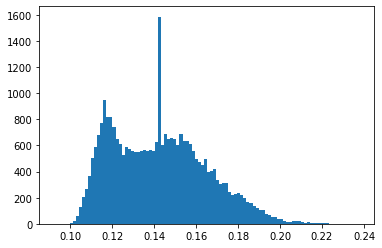

In [0]:
_ = plt.hist(cleaned_data["L3_O3_O3_column_number_density"], bins=100)

In [0]:
from sklearn.preprocessing import Binarizer

def discritize_feature(data):
    bn = Binarizer(threshold=0.9)
    data["L3_NO2_sensor_altitude"] = data["L3_NO2_sensor_altitude"].fillna(0)
    data["L3_CO_sensor_altitude"] = data["L3_CO_sensor_altitude"].fillna(0)

    data["L3_NO2_sensor_altitude"] = bn.transform([data["L3_NO2_sensor_altitude"]])[0]
    data["L3_CO_sensor_altitude"] = bn.transform([data["L3_CO_sensor_altitude"]])[0]

    return data

## Data preparation

### Preparing train data

In [0]:
angle_cols_to_remove = [col for col in data.columns if ("angle" in col) and ("AER_AI" not in col)]
cleaned_data = data.drop(angle_cols_to_remove, axis=1)
cleaned_data = fill_missing_values(cleaned_data)
cleaned_data = discritize_feature(cleaned_data)

X = cleaned_data.iloc[:, 5:]
y = cleaned_data["target"]

X.shape

(30557, 46)

### Preparing test data

In [0]:
test_data = pd.read_csv(path+"Test.csv")
ids = test_data["Place_ID X Date"]
test_data = test_data.drop(["Place_ID X Date", "Date", "Place_ID"], axis = 1)

test_data = test_data.drop(angle_cols_to_remove, axis=1)
test_data = fill_missing_values(test_data)
test_data = discritize_feature(test_data)

test_data.shape

(16136, 46)

## Training

In [0]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X, y)
lr.score(X,y)

0.36401049535803787

In [0]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
regr.score(X, y)

In [0]:
import xgboost

angle_cols_to_remove = [col for col in data.columns if ("angle" in col) and ("AER_AI" not in col)]
cleaned_data = data.drop(angle_cols_to_remove, axis=1)
cleaned_data = fill_missing_values(cleaned_data)
cleaned_data = discritize_feature(cleaned_data)

X = cleaned_data.iloc[:, 5:]
y = cleaned_data["target"]

X.shape

import pandas as pd
from sklearn import preprocessing


def normlX(X):
    x = X.values #returns a numpy array
    cols = X.columns
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    X = pd.DataFrame(x_scaled, columns=cols)

    return X

def feature_eng(density_X):
    density_features = ["L3_NO2_NO2_column_number_density", "L3_NO2_stratospheric_NO2_column_number_density", "L3_O3_O3_column_number_density", "L3_NO2_tropospheric_NO2_column_number_density",
                    "L3_CO_CO_column_number_density", 
                    "L3_SO2_SO2_column_number_density", "L3_SO2_SO2_column_number_density_amf",
                    "L3_HCHO_tropospheric_HCHO_column_number_density", "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
                    ]
    density_X["windspread"] = np.sqrt(density_X["u_component_of_wind_10m_above_ground"]**2 + density_X["v_component_of_wind_10m_above_ground"]**2)
    density_X["density_sum"] = density_X[density_features].sum(axis=1)
    density_X["L3_CH4_aerosol_height"] = np.log(density_X["L3_CH4_aerosol_height"])
    density_X["L3_NO2_tropopause_pressure"] = np.log(density_X["L3_NO2_tropopause_pressure"])
    density_X["L3_CLOUD_cloud_top_pressure"] = np.log(density_X["L3_CLOUD_cloud_top_pressure"])
    # new
    density_X["temperature_2m_above_ground"] = np.log(density_X["temperature_2m_above_ground"])
    density_X["L3_O3_O3_effective_temperature"] = np.log(density_X["L3_O3_O3_effective_temperature"])

    return density_X

def exp_feature_eng(density_X):
    return density_X.apply(np.exp)

def exp2_feature_eng(density_X):
    density_X = normlX(density_X)
    return density_X.apply(np.exp2)

def exp2_feature_eng_hardcore(density_X):
    return density_X.apply(np.exp2)

def ten_feature_eng(density_X):
    return density_X.apply(lambda x: pow(10, x))

def arccos_feature_eng(density_X):
    return density_X.apply(np.arccos)

X = feature_eng(X)



xgb_model = xgboost.XGBRegressor(min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.6, max_depth=10, nthread=-1)
xgb_model.fit(X, y) 
xgb_model.score(X, y)

# with X norm 0.8869287596520352
# with feature_eng 0.8931413788873316
# with new feature_eng 0.8958650386957194
# with feature_eng + X_norm  0.8918378627463109
# with exp_feature_eng 0.8910064941134513
# with Xnorm + exp(normal) 0.8878093993934109
# with exp2_feature_eng 0.8873096144088962
# with exp2_feature_eng_hardcore 0.881050223404052
# with ten_feature_eng 0.7973022545880945
# with norm + arccos 0.8848446005624693

# with feature_eng + norm + arccos 0.8962454111990809 

# with feature_eng min_child_weight=1, gamma=0.04, subsample=0.7, colsample_bytree=0.6, max_depth=10, nthread=-1      0.913982030463545

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[23:58:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8932762991665388

## Prediction

In [0]:
model = xgb_model

In [0]:
test_data = pd.read_csv(path+"Test.csv")
ids = test_data["Place_ID X Date"]
test_data = test_data.drop(["Place_ID X Date", "Date", "Place_ID"], axis = 1)

test_data = test_data.drop(angle_cols_to_remove, axis=1)
test_data = fill_missing_values(test_data)
test_data = discritize_feature(test_data)


test_data = feature_eng(test_data)

prediction = model.predict(test_data)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [0]:
prediction_df = pd.DataFrame(ids, columns=['Place_ID X Date'])
prediction_df["target"] = prediction
prediction_df.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,49.740780
1,0OS9LVX X 2020-01-03,38.209949
2,0OS9LVX X 2020-01-04,48.799992
3,0OS9LVX X 2020-01-05,46.347565
4,0OS9LVX X 2020-01-06,30.020870


In [0]:
prediction_df.to_csv("simple_submission#fs1.csv", index=False)